La exactitud del modelo es: 0.9333333333333333


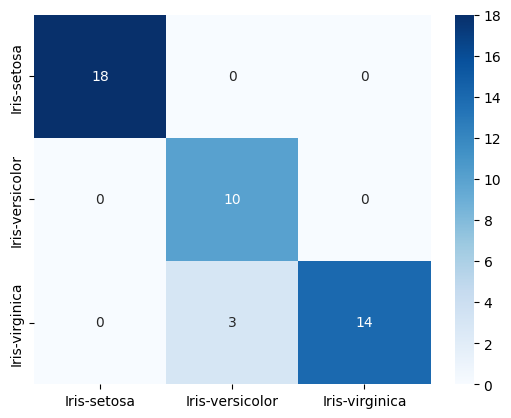

['Iris-setosa']
['Iris-versicolor']
SepalLengthCm 0.028001914660831486
SepalWidthCm 0.0
PetalLengthCm 0.5461180979867356
PetalWidthCm 0.425879987352433


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

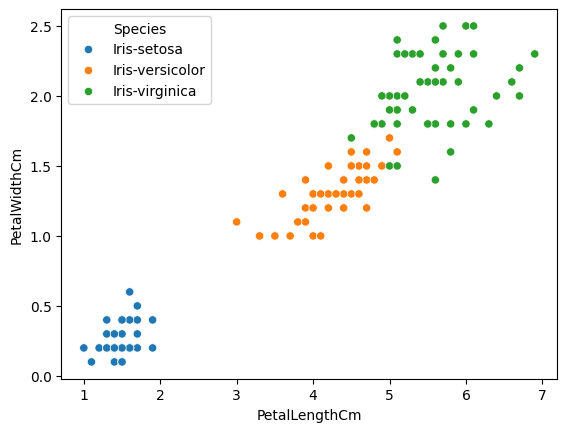

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Leer archivo
datos = pd.read_csv("Iris.csv")
datos = datos.drop('Id', axis=1)

# Separar características (X) y etiquetas (Y)
x = datos.iloc[:, :-1]
y = datos['Species']  # Cambiado a Serie

# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# Crear modelo
modelo = DecisionTreeClassifier()
#modelo = KNeighborsClassifier(5)
# Entrenar el modelo
modelo.fit(x_train, y_train)

# Determinar las salidas de las X_test
y_obt = modelo.predict(x_test)

# Evaluar el modelo
exactitud = accuracy_score(y_test, y_obt)
matriz = confusion_matrix(y_test, y_obt)

print(f"La exactitud del modelo es: {exactitud}")

# Gráfica de la matriz de confusión
sns.heatmap(matriz, annot=True, cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.show()

# Predicciones con datos nuevos
tipo_flor = modelo.predict(pd.DataFrame([[4.5, 3.2, 1.6, 0.3]], columns=x.columns))
print(tipo_flor)

tipo_flor = modelo.predict(pd.DataFrame([[3, 2.2, 2.5, 0.5]], columns=x.columns))
print(tipo_flor)

# Importancia de las características
importancia = modelo.feature_importances_
nombres_column = datos.columns[:-1].tolist()  # Nombres de las características

for (i, k) in zip(importancia, nombres_column):
    print(k, i)

#Gráfico de dispersión
sns.scatterplot(data=datos, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
